# PHQ-9 Exploratory Data Analysis

**Objective**: Analyze PHQ-9 survey data to understand:
- Class distribution for suicidal ideation (Item #9)
- Overall depression severity (total score)
- Missing data patterns
- Data quality for modeling

**Date**: December 2025  
**Dataset**: StudentLife PHQ-9 Survey

In [1]:
# Import libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Import custom modules
from src.preprocessing.phq9_processor import PHQ9Processor

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Load PHQ-9 Data

In [2]:
# Initialize processor
data_path = "../data/raw/dataset/survey/PHQ-9.csv"
processor = PHQ9Processor(data_path)

# Load data
phq9_df = processor.load_data()
phq9_df.head()

Loaded PHQ-9 data: 84 responses
  - Pre-assessment: 46
  - Post-assessment: 38


,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response
0,u00,pre,Not at all,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all
1,u01,pre,Several days,Several days,Several days,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Very difficult
2,u02,pre,More than half the days,Several days,More than half the days,More than half the days,More than half the days,Several days,Several days,More than half the days,Not at all,Somewhat difficult
3,u03,pre,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Somewhat difficult
4,u04,pre,Several days,Several days,Not at all,Several days,Several days,Several days,Several days,Not at all,Not at all,Somewhat difficult


## 2. Data Overview

In [3]:
# Basic statistics
print("Dataset shape:", phq9_df.shape)
print("\nColumn names:")
print(phq9_df.columns.tolist())

# Assessment type distribution
print("\nAssessment type distribution:")
print(phq9_df['type'].value_counts())

# Unique users
print(f"\nUnique users: {phq9_df['uid'].nunique()}")
print(f"  Pre-assessment: {phq9_df[phq9_df['type']=='pre']['uid'].nunique()}")
print(f"  Post-assessment: {phq9_df[phq9_df['type']=='post']['uid'].nunique()}")

Dataset shape: (84, 12)

Column names:
['uid', 'type', 'Little interest or pleasure in doing things', 'Feeling down, depressed, hopeless.', 'Trouble falling or staying asleep, or sleeping too much.', 'Feeling tired or having little energy', 'Poor appetite or overeating', 'Feeling bad about yourself or that you are a failure or have let yourself or your family down', 'Trouble concentrating on things, such as reading the newspaper or watching television', 'Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual', 'Thoughts that you would be better off dead, or of hurting yourself', 'Response']

Assessment type distribution:
type
pre     46
post    38
Name: count, dtype: int64

Unique users: 46
  Pre-assessment: 46
  Post-assessment: 38


## 3. Item #9 Analysis (Suicidal Ideation) - PRIMARY OUTCOME

In [4]:
# Create Item #9 labels
item9_labels_pre = processor.create_item9_labels(assessment_type='pre')
item9_labels_post = processor.create_item9_labels(assessment_type='post')


PRE-ASSESSMENT Item #9 Distribution:
  Total: 46
  Class 0 (No ideation): 42 (91.3%)
  Class 1 (Any ideation): 4 (8.7%)
  Imbalance ratio: 10.50:1
  Users with ideation: ['u18', 'u19', 'u31', 'u50']

POST-ASSESSMENT Item #9 Distribution:
  Total: 38
  Class 0 (No ideation): 33 (86.8%)
  Class 1 (Any ideation): 5 (13.2%)
  Imbalance ratio: 6.60:1
  Users with ideation: ['u18', 'u19', 'u23', 'u33', 'u52']


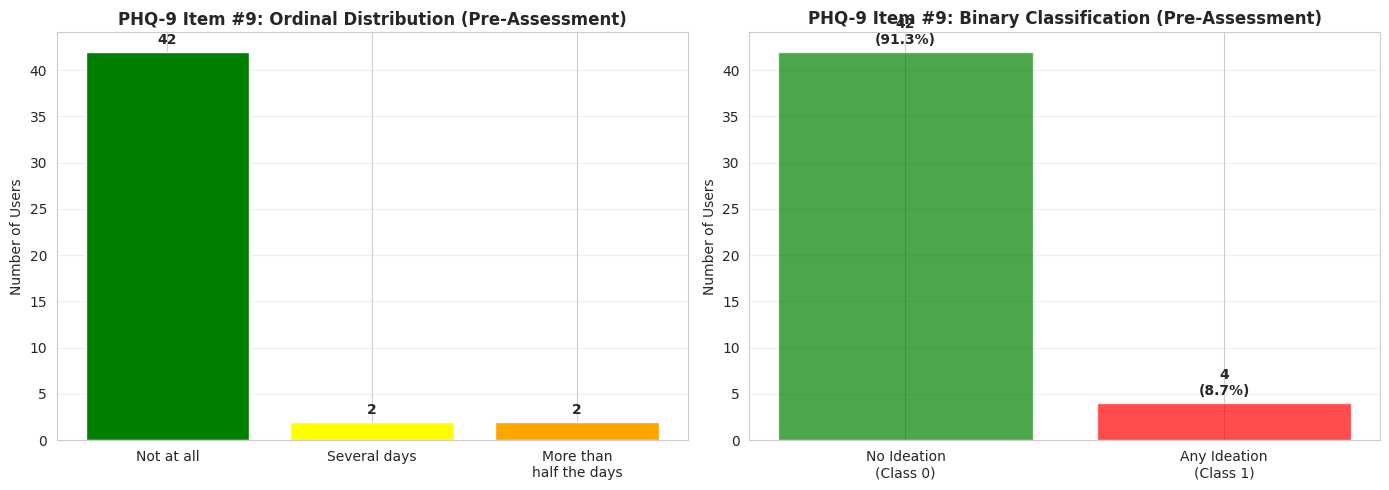


Class imbalance ratio: 42/4 = 10.50:1


In [5]:
# Visualize Item #9 distribution - PRE-ASSESSMENT
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ordinal scores (0-3)
ax = axes[0]
score_counts = item9_labels_pre['item9_score'].value_counts().sort_index()
score_labels = ['Not at all', 'Several days', 'More than\nhalf the days', 'Nearly\nevery day']
ax.bar(range(len(score_counts)), score_counts.values, color=['green', 'yellow', 'orange', 'red'])
ax.set_xticks(range(len(score_counts)))
ax.set_xticklabels([score_labels[i] for i in score_counts.index])
ax.set_ylabel('Number of Users')
ax.set_title('PHQ-9 Item #9: Ordinal Distribution (Pre-Assessment)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(score_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Binary classification
ax = axes[1]
binary_counts = item9_labels_pre['item9_binary'].value_counts().sort_index()
ax.bar(['No Ideation\n(Class 0)', 'Any Ideation\n(Class 1)'], binary_counts.values, 
       color=['green', 'red'], alpha=0.7)
ax.set_ylabel('Number of Users')
ax.set_title('PHQ-9 Item #9: Binary Classification (Pre-Assessment)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add count and percentage labels
for i, v in enumerate(binary_counts.values):
    pct = v / binary_counts.sum() * 100
    ax.text(i, v + 0.5, f'{v}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/item9_distribution_pre.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nClass imbalance ratio: {binary_counts[0]}/{binary_counts[1]} = {binary_counts[0]/binary_counts[1]:.2f}:1")

## 4. PHQ-9 Total Score Analysis - SECONDARY OUTCOME

In [6]:
# Create PHQ-9 total score labels
phq9_labels_pre = processor.create_phq9_total_labels(assessment_type='pre', threshold=10)
phq9_labels_post = processor.create_phq9_total_labels(assessment_type='post', threshold=10)


PRE-ASSESSMENT PHQ-9 Total Score Distribution:
  Mean: 5.52 ± 4.61
  Median: 5
  Range: 0 - 23

  Clinical depression (≥10): 8 (17.4%)

  Severity distribution:
    Minimal: 21 (45.7%)
    Mild: 17 (37.0%)
    Moderate: 6 (13.0%)
    Moderately severe: 1 (2.2%)
    Severe: 1 (2.2%)

POST-ASSESSMENT PHQ-9 Total Score Distribution:
  Mean: 6.26 ± 5.84
  Median: 4
  Range: 0 - 25

  Clinical depression (≥10): 7 (18.4%)

  Severity distribution:
    Minimal: 19 (50.0%)
    Mild: 12 (31.6%)
    Moderate: 3 (7.9%)
    Moderately severe: 2 (5.3%)
    Severe: 2 (5.3%)


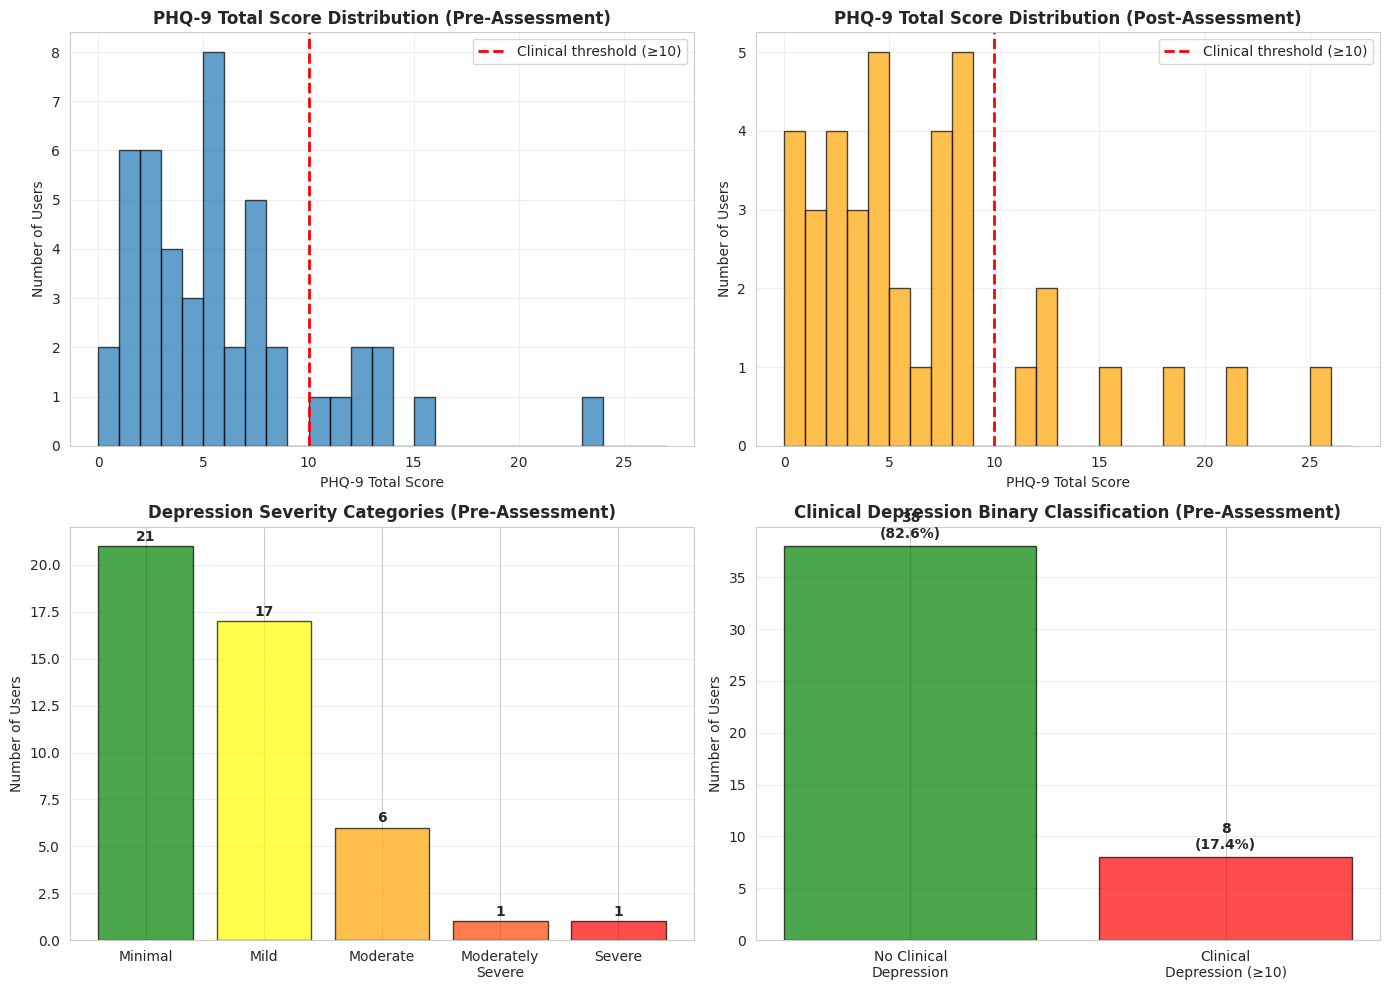

In [7]:
# Visualize PHQ-9 total score distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram - Pre
ax = axes[0, 0]
ax.hist(phq9_labels_pre['phq9_total'], bins=range(0, 28), edgecolor='black', alpha=0.7)
ax.axvline(10, color='red', linestyle='--', linewidth=2, label='Clinical threshold (≥10)')
ax.set_xlabel('PHQ-9 Total Score')
ax.set_ylabel('Number of Users')
ax.set_title('PHQ-9 Total Score Distribution (Pre-Assessment)', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Histogram - Post
ax = axes[0, 1]
ax.hist(phq9_labels_post['phq9_total'], bins=range(0, 28), edgecolor='black', alpha=0.7, color='orange')
ax.axvline(10, color='red', linestyle='--', linewidth=2, label='Clinical threshold (≥10)')
ax.set_xlabel('PHQ-9 Total Score')
ax.set_ylabel('Number of Users')
ax.set_title('PHQ-9 Total Score Distribution (Post-Assessment)', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Severity categories - Pre
ax = axes[1, 0]
severity_counts_pre = phq9_labels_pre['depression_severity'].value_counts().sort_index()
severity_names = ['Minimal', 'Mild', 'Moderate', 'Moderately\nSevere', 'Severe']
colors = ['green', 'yellow', 'orange', 'orangered', 'red']
ax.bar(range(len(severity_counts_pre)), severity_counts_pre.values, color=colors, alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(severity_counts_pre)))
ax.set_xticklabels([severity_names[i] for i in severity_counts_pre.index])
ax.set_ylabel('Number of Users')
ax.set_title('Depression Severity Categories (Pre-Assessment)', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add counts
for i, v in enumerate(severity_counts_pre.values):
    ax.text(i, v + 0.3, str(v), ha='center', fontweight='bold')

# Binary clinical depression - Pre
ax = axes[1, 1]
clinical_counts = phq9_labels_pre['clinical_depression'].value_counts().sort_index()
ax.bar(['No Clinical\nDepression', 'Clinical\nDepression (≥10)'], 
       clinical_counts.values, color=['green', 'red'], alpha=0.7, edgecolor='black')
ax.set_ylabel('Number of Users')
ax.set_title('Clinical Depression Binary Classification (Pre-Assessment)', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add counts and percentages
for i, v in enumerate(clinical_counts.values):
    pct = v / clinical_counts.sum() * 100
    ax.text(i, v + 0.5, f'{v}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/phq9_total_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Longitudinal Analysis (Pre vs Post)

In [8]:
# Merge pre and post for matched users
merged = item9_labels_pre.merge(item9_labels_post, on='uid', suffixes=('_pre', '_post'), how='inner')

print(f"Users with both pre and post assessments: {len(merged)}")
print(f"\nItem #9 changes:")
print(f"  Stable negative (0→0): {((merged['item9_binary_pre']==0) & (merged['item9_binary_post']==0)).sum()}")
print(f"  Improved (1→0): {((merged['item9_binary_pre']==1) & (merged['item9_binary_post']==0)).sum()}")
print(f"  Worsened (0→1): {((merged['item9_binary_pre']==0) & (merged['item9_binary_post']==1)).sum()}")
print(f"  Stable positive (1→1): {((merged['item9_binary_pre']==1) & (merged['item9_binary_post']==1)).sum()}")

Users with both pre and post assessments: 38

Item #9 changes:
  Stable negative (0→0): 32
  Improved (1→0): 1
  Worsened (0→1): 3
  Stable positive (1→1): 2


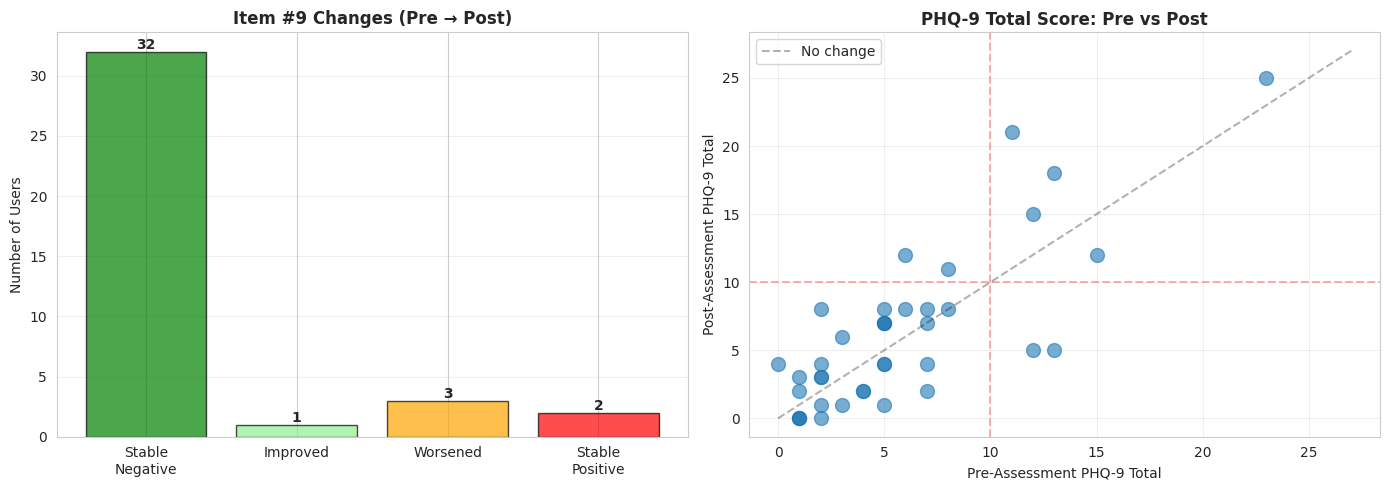

In [9]:
# Visualize pre-post changes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Item #9 changes
ax = axes[0]
change_categories = ['Stable\nNegative', 'Improved', 'Worsened', 'Stable\nPositive']
change_counts = [
    ((merged['item9_binary_pre']==0) & (merged['item9_binary_post']==0)).sum(),
    ((merged['item9_binary_pre']==1) & (merged['item9_binary_post']==0)).sum(),
    ((merged['item9_binary_pre']==0) & (merged['item9_binary_post']==1)).sum(),
    ((merged['item9_binary_pre']==1) & (merged['item9_binary_post']==1)).sum()
]
colors = ['green', 'lightgreen', 'orange', 'red']
ax.bar(change_categories, change_counts, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Number of Users')
ax.set_title('Item #9 Changes (Pre → Post)', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(change_counts):
    ax.text(i, v + 0.2, str(v), ha='center', fontweight='bold')

# PHQ-9 total score changes
merged_phq9 = phq9_labels_pre.merge(phq9_labels_post, on='uid', suffixes=('_pre', '_post'), how='inner')
ax = axes[1]
ax.scatter(merged_phq9['phq9_total_pre'], merged_phq9['phq9_total_post'], alpha=0.6, s=100)
ax.plot([0, 27], [0, 27], 'k--', alpha=0.3, label='No change')
ax.axhline(10, color='red', linestyle='--', alpha=0.3)
ax.axvline(10, color='red', linestyle='--', alpha=0.3)
ax.set_xlabel('Pre-Assessment PHQ-9 Total')
ax.set_ylabel('Post-Assessment PHQ-9 Total')
ax.set_title('PHQ-9 Total Score: Pre vs Post', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/pre_post_changes.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Missing Data Analysis

In [10]:
# Check for missing values
print("Missing values per column:")
missing_counts = phq9_df.isnull().sum()
missing_pct = (missing_counts / len(phq9_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing %': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df.to_string(index=False))

# Check for users missing post-assessment
users_pre = set(phq9_df[phq9_df['type']=='pre']['uid'])
users_post = set(phq9_df[phq9_df['type']=='post']['uid'])
missing_post = users_pre - users_post

print(f"\nUsers with pre-assessment but no post-assessment: {len(missing_post)}")
if len(missing_post) > 0:
    print(f"Missing users: {sorted(list(missing_post))}")

Missing values per column:
  Column  Missing Count  Missing %
Response              5       5.95

Users with pre-assessment but no post-assessment: 8
Missing users: ['u08', 'u12', 'u13', 'u22', 'u39', 'u46', 'u50', 'u57']


## 7. Individual Item Analysis

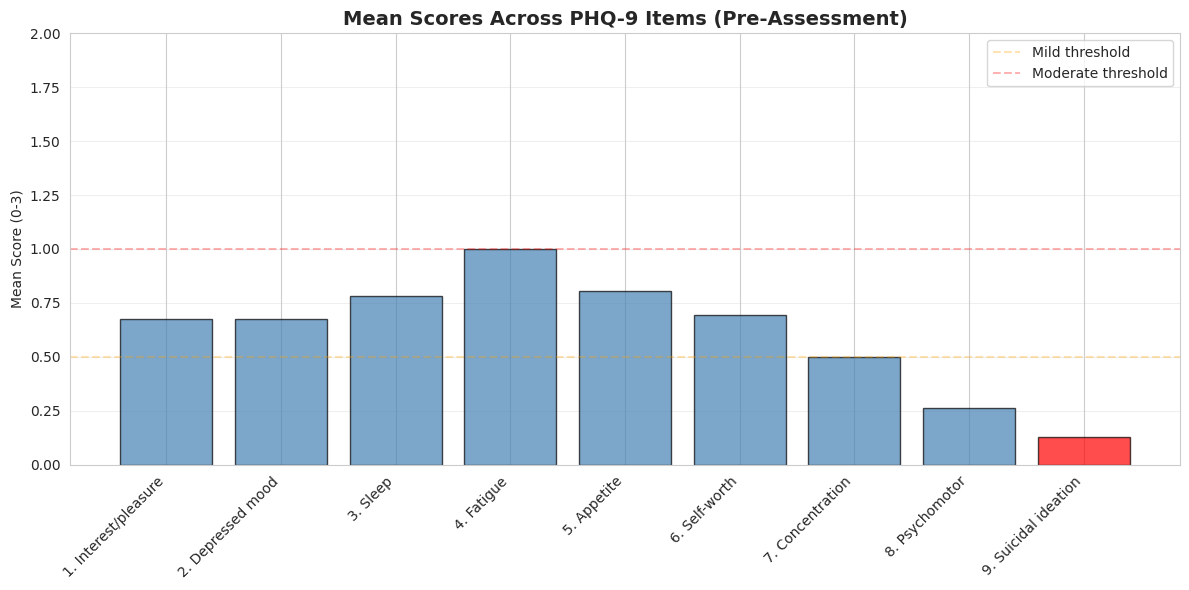


PHQ-9 Item Statistics (Pre-Assessment):
  1. Interest/pleasure: 0.674
  2. Depressed mood: 0.674
  3. Sleep: 0.783
  4. Fatigue: 1.000
  5. Appetite: 0.804
  6. Self-worth: 0.696
  7. Concentration: 0.500
  8. Psychomotor: 0.261
  9. Suicidal ideation: 0.130


In [11]:
# Analyze all 9 PHQ-9 items for pre-assessment
df_encoded = processor.encode_responses()
df_pre = df_encoded[df_encoded['type'] == 'pre'].copy()

# Calculate mean score for each item
item_means = []
for col in processor.ITEM_COLUMNS:
    encoded_col = f"{col}_encoded"
    mean_score = df_pre[encoded_col].mean()
    item_means.append(mean_score)

# Create short labels for items
item_labels = [
    '1. Interest/pleasure',
    '2. Depressed mood',
    '3. Sleep',
    '4. Fatigue',
    '5. Appetite',
    '6. Self-worth',
    '7. Concentration',
    '8. Psychomotor',
    '9. Suicidal ideation'
]

# Plot
plt.figure(figsize=(12, 6))
colors = ['red' if i == 8 else 'steelblue' for i in range(9)]  # Highlight Item #9
plt.bar(range(9), item_means, color=colors, alpha=0.7, edgecolor='black')
plt.xticks(range(9), item_labels, rotation=45, ha='right')
plt.ylabel('Mean Score (0-3)')
plt.title('Mean Scores Across PHQ-9 Items (Pre-Assessment)', fontweight='bold', fontsize=14)
plt.ylim(0, 2)
plt.axhline(0.5, color='orange', linestyle='--', alpha=0.3, label='Mild threshold')
plt.axhline(1.0, color='red', linestyle='--', alpha=0.3, label='Moderate threshold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/phq9_items_mean_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Print item statistics
print("\nPHQ-9 Item Statistics (Pre-Assessment):")
for i, (label, mean) in enumerate(zip(item_labels, item_means)):
    print(f"  {label}: {mean:.3f}")

## 8. Save Processed Labels

In [12]:
# Save labels to processed directory
output_dir = "../data/processed/labels"

# Pre-assessment (primary)
processor.save_labels(output_dir, assessment_type='pre')

# Post-assessment (secondary)
print("\n" + "="*60)
processor.save_labels(output_dir, assessment_type='post')

print("\n✓ All labels saved successfully!")


PRE-ASSESSMENT Item #9 Distribution:
  Total: 46
  Class 0 (No ideation): 42 (91.3%)
  Class 1 (Any ideation): 4 (8.7%)
  Imbalance ratio: 10.50:1
  Users with ideation: ['u18', 'u19', 'u31', 'u50']

Saved Item #9 labels to: ../data/processed/labels/item9_labels_pre.csv

PRE-ASSESSMENT PHQ-9 Total Score Distribution:
  Mean: 5.52 ± 4.61
  Median: 5
  Range: 0 - 23

  Clinical depression (≥10): 8 (17.4%)

  Severity distribution:
    Minimal: 21 (45.7%)
    Mild: 17 (37.0%)
    Moderate: 6 (13.0%)
    Moderately severe: 1 (2.2%)
    Severe: 1 (2.2%)
Saved PHQ-9 total labels to: ../data/processed/labels/phq9_labels_pre.csv


POST-ASSESSMENT Item #9 Distribution:
  Total: 38
  Class 0 (No ideation): 33 (86.8%)
  Class 1 (Any ideation): 5 (13.2%)
  Imbalance ratio: 6.60:1
  Users with ideation: ['u18', 'u19', 'u23', 'u33', 'u52']

Saved Item #9 labels to: ../data/processed/labels/item9_labels_post.csv

POST-ASSESSMENT PHQ-9 Total Score Distribution:
  Mean: 6.26 ± 5.84
  Median: 4
  Range

## 9. Summary Statistics for Paper

In [13]:
# Create summary table for manuscript
summary = {
    'Metric': [],
    'Pre-Assessment': [],
    'Post-Assessment': []
}

# Sample size
summary['Metric'].append('Sample Size')
summary['Pre-Assessment'].append(len(item9_labels_pre))
summary['Post-Assessment'].append(len(item9_labels_post))

# Item #9 statistics
summary['Metric'].append('Suicidal Ideation (n, %)')
summary['Pre-Assessment'].append(f"{item9_labels_pre['item9_binary'].sum()} ({item9_labels_pre['item9_binary'].mean()*100:.1f}%)")
summary['Post-Assessment'].append(f"{item9_labels_post['item9_binary'].sum()} ({item9_labels_post['item9_binary'].mean()*100:.1f}%)")

# PHQ-9 total
summary['Metric'].append('PHQ-9 Total (mean ± SD)')
summary['Pre-Assessment'].append(f"{phq9_labels_pre['phq9_total'].mean():.2f} ± {phq9_labels_pre['phq9_total'].std():.2f}")
summary['Post-Assessment'].append(f"{phq9_labels_post['phq9_total'].mean():.2f} ± {phq9_labels_post['phq9_total'].std():.2f}")

# Clinical depression
summary['Metric'].append('Clinical Depression (≥10) (n, %)')
summary['Pre-Assessment'].append(f"{phq9_labels_pre['clinical_depression'].sum()} ({phq9_labels_pre['clinical_depression'].mean()*100:.1f}%)")
summary['Post-Assessment'].append(f"{phq9_labels_post['clinical_depression'].sum()} ({phq9_labels_post['clinical_depression'].mean()*100:.1f}%)")

summary_df = pd.DataFrame(summary)
print("\n" + "="*80)
print("SUMMARY TABLE FOR MANUSCRIPT")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)

# Save to CSV
summary_df.to_csv('../results/tables/phq9_summary_statistics.csv', index=False)
print("\n✓ Summary table saved to results/tables/phq9_summary_statistics.csv")


SUMMARY TABLE FOR MANUSCRIPT
                          Metric Pre-Assessment Post-Assessment
                     Sample Size             46              38
        Suicidal Ideation (n, %)       4 (8.7%)       5 (13.2%)
         PHQ-9 Total (mean ± SD)    5.52 ± 4.61     6.26 ± 5.84
Clinical Depression (≥10) (n, %)      8 (17.4%)       7 (18.4%)

✓ Summary table saved to results/tables/phq9_summary_statistics.csv


## Key Findings

### Pre-Assessment (Primary Outcome - n=46):
**Suicidal Ideation (PHQ-9 Item #9):**
- **4 users (8.7%)** with any suicidal ideation
- **Class imbalance**: 10.50:1 (severe imbalance)
- **Users with ideation**: u18, u19, u31, u50
- **Distribution**:
  - "Not at all": 42 users (91.3%)
  - "Several days": 2 users (4.3%) - u19, u50
  - "More than half the days": 2 users (4.3%) - u18, u31
  - "Nearly every day": 0 users (0%)

### Post-Assessment (Longitudinal Analysis - n=38):
**Suicidal Ideation (PHQ-9 Item #9):**
- **5 users (13.2%)** with any suicidal ideation
- **Class imbalance**: 6.60:1
- **Users with ideation**: u18, u19, u23, u33, u52
- **Distribution**:
  - "Not at all": 33 users (86.8%)
  - "Several days": 3 users (7.9%) - u19, u23, u52
  - "More than half the days": 2 users (5.3%) - u18, u33
  - "Nearly every day": 0 users (0%)

### Longitudinal Patterns (Pre → Post):
- **Persistent ideation**: 2 users (u18, u19) - present at both timepoints
- **Resolved**: 2 users (u31, u50) - ideation at pre but not post
- **New onset**: 3 users (u23, u33, u52) - ideation at post but not pre
- **8 dropouts**: Users who completed pre but not post assessment

### Secondary Outcome (PHQ-9 Total):
- **Pre-assessment**: Mean 5.52 ± 4.61, 8 users (17.4%) with clinical depression (≥10)
- **Post-assessment**: Mean 6.26 ± 5.84, 7 users (18.4%) with clinical depression (≥10)

### Data Quality:
- **46 pre-assessment** participants available for modeling
- **38 post-assessment** participants (8 dropouts)
- **All 46 users** meet inclusion criteria (≥14 days data)
- **Mean data collection**: 76.0 ± 38.8 days per user
- **7 modalities** successfully parsed per user

### Next Steps:
1. **Primary Analysis**: Predict pre-assessment Item #9 (max sample n=46)
2. **Secondary Analysis**: Predict post-assessment Item #9 (n=38)
3. **Longitudinal Analysis**: Predict changes in ideation (pre→post)
4. Extract behavioral features from smartphone sensors
5. Build predictive models with severe class imbalance strategies (LOOCV, class weights)